In [1]:
from utils import *
from analysis import *
import multiprocessing as mp
import pathlib
from tqdm.notebook import tqdm
import gc
from pathlib import Path
from computation.simulation import *
from computation import *


fig_dir = pathlib.Path(".") / "figs"


# Probability Distributions

We expect distributions of the form 
$$
\begin{aligned}
    P(S = s) &= s^{1-\tau} \\
    P(T = t) &= s^{1-\alpha} \\
    P(R = r) &= s^{1-\lambda}
\end{aligned}
$$

# 2D Grid comparison
Compare on the 2D grid the different parameters of the systems.

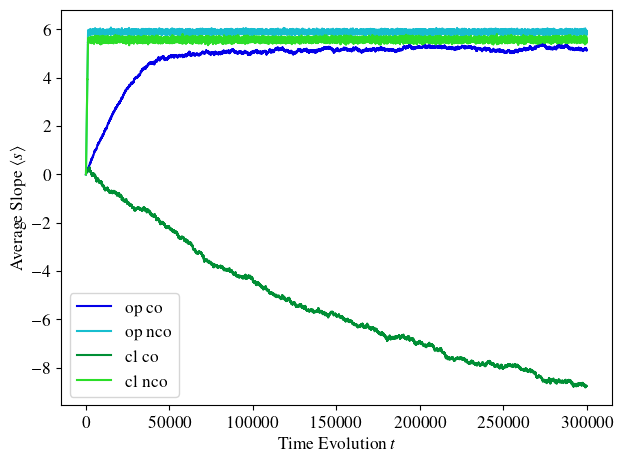

In [10]:
from pathlib import Path


# data_dirs = Path().cwd().joinpath("data/2D").glob("d2_g20*")

systems = [
    Sandpile16Bit(2, 20, 7, True, True),
    Sandpile16Bit(2, 20, 7, True, False),
    Sandpile16Bit(2, 20, 7, False, True),
    Sandpile16Bit(2, 20, 7, False, False)
]
labels = [
    "op co",
    "op nco",
    "cl co",
    "cl nco"
]

plt.figure("2d_bp_comparison")
for system, label in zip(systems, labels):
    system.simulate(300_000)
    # step, slope = load_slope_values((data_dir / "data_1.slopes.npy"))
    s = system.get_average_slopes()
    plt.plot(range(len(s)), s, label=label)
plt.xlabel(r"Time Evolution $t$")
plt.ylabel(r"Average Slope $\langle s \rangle$")

plt.legend()
plt.savefig(fig_dir / "2d_bp_comparison.png", bbox_inches="tight")


# Comparison of grid sizes

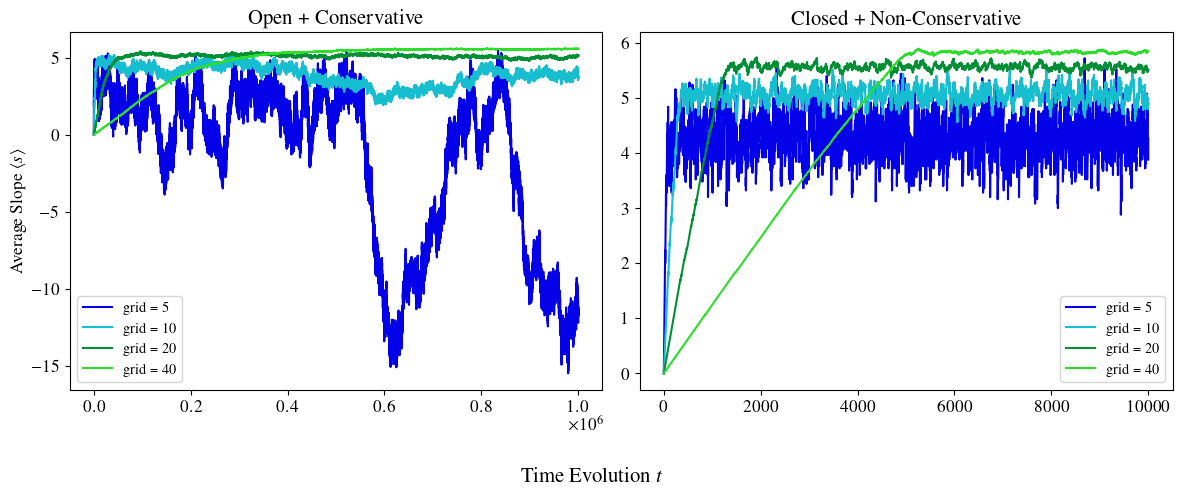

In [4]:
grid_sizes = [5, 10, 20, 40]

fig = plt.figure("2d_grid_comparison", figsize=(12, 5))
plt.subplot(121)
plt.ylabel(r"Average Slope $\langle s \rangle$")
plt.title("Open + Conservative")
plt.subplot(122)
plt.title("Closed + Non-Conservative")

for grid in grid_sizes:
    # open conservative
    system = Sandpile16Bit(2, grid, 7, True, True)
    system.simulate(1_000_000, seed=1)
    plt.subplot(121)
    s = system.get_average_slopes()
    plt.plot(range(len(s)), s, label=f"grid = {grid}")
    plt.legend(fontsize="small")

    # closed non conservative

    plt.subplot(122)
    system = Sandpile16Bit(2, grid, 7, False, False)
    system.simulate(10_000, seed=1)
    s = system.get_average_slopes()
    plt.plot(range(len(s)), s, label=f"grid = {grid}")
    plt.legend(fontsize="small")

gc.collect()
# plt.legend()
fig.supxlabel(r"Time Evolution $t$")
# plt.savefig(fig_dir / "2d_grid_comparison.pdf", bbox_inches="tight", dpi=300)
plt.savefig(fig_dir / "2d_grid_comparison.png", bbox_inches="tight", dpi=300)



# 2D comparison of scaling exponents


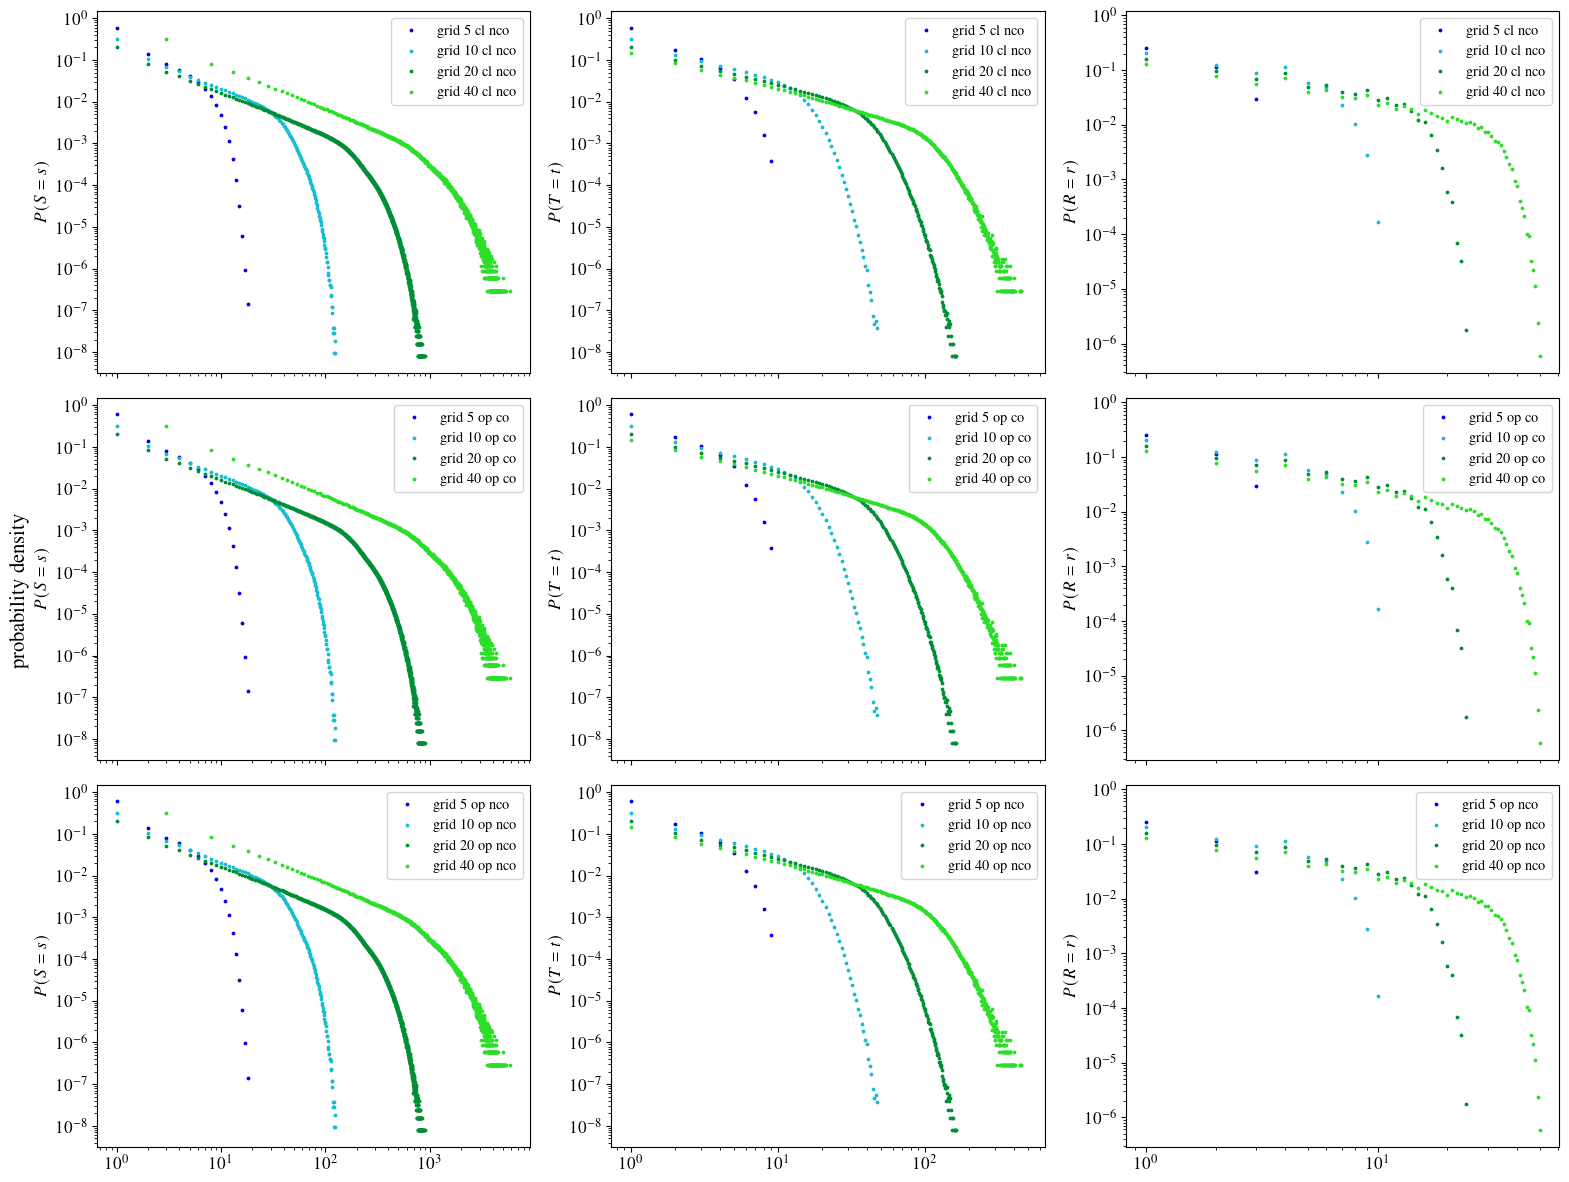

In [2]:
grid_sizes = [5, 10, 20, 40]

fig, ax = plt.subplots(3, 3, figsize=(16, 12), sharex="col")

fig.supylabel("probability density")

# closed non conservative, different grid
for grid in grid_sizes:
    data_dir = Path().cwd().joinpath(f"data/2D/d2_g{grid}_c7_cl_nco")
    # df = load_combine_avalanche_data_samples(data_dir, with_dissipation=False, sample_count=N)
    edges, bins = load_3d_dist(data_dir/"avalanche_distribution.npz")

    plt.subplot(331)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$P(S=s)$")
    plt.scatter(edges[0], bins.sum(axis=(1, 2)), label=f"grid {grid} cl nco", s=3)
    plt.legend(fontsize="small")

    plt.subplot(332)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$P(T=t)$")
    plt.scatter(edges[1], bins.sum(axis=(0, 2)), label=f"grid {grid} cl nco", s=3)
    plt.legend(fontsize="small")

    plt.subplot(333)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$P(R=r)$")
    plt.scatter(edges[2], bins.sum(axis=(0, 1)), label=f"grid {grid} cl nco", s=3)
    plt.legend(fontsize="small")

# open conservative, different grid
for grid in grid_sizes:
    data_dir = Path().cwd().joinpath(f"data/2D/d2_g{grid}_c7_cl_nco")
    # df = load_combine_avalanche_data_samples(data_dir, with_dissipation=False, sample_count=N)
    edges, bins = load_3d_dist(data_dir/"avalanche_distribution.npz")

    plt.subplot(334)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$P(S=s)$")
    plt.scatter(edges[0], bins.sum(axis=(1, 2)), label=f"grid {grid} op co", s=3)
    plt.legend(fontsize="small")

    plt.subplot(335)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$P(T=t)$")
    plt.scatter(edges[1], bins.sum(axis=(0, 2)), label=f"grid {grid} op co", s=3)
    plt.legend(fontsize="small")

    plt.subplot(336)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$P(R=r)$")
    plt.scatter(edges[2], bins.sum(axis=(0, 1)), label=f"grid {grid} op co", s=3)
    plt.legend(fontsize="small")

# open non conservative, different grid
for grid in grid_sizes:
    data_dir = Path().cwd().joinpath(f"data/2D/d2_g{grid}_c7_cl_nco")
    # df = load_combine_avalanche_data_samples(data_dir, with_dissipation=False, sample_count=N)
    edges, bins = load_3d_dist(data_dir/"avalanche_distribution.npz")

    plt.subplot(337)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$P(S=s)$")
    plt.scatter(edges[0], bins.sum(axis=(1, 2)), label=f"grid {grid} op nco", s=3)
    plt.legend(fontsize="small")

    plt.subplot(338)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$P(T=t)$")
    plt.scatter(edges[1], bins.sum(axis=(0, 2)), label=f"grid {grid} op nco", s=3)
    plt.legend(fontsize="small")

    plt.subplot(339)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$P(R=r)$")
    plt.scatter(edges[2], bins.sum(axis=(0, 1)), label=f"grid {grid} op nco", s=3)
    plt.legend(fontsize="small")
#
# plt.savefig(fig_dir / "comparison_grid_distributions.png", dpi=300)
# plt.savefig(fig_dir / "comparison_grid_distributions.pdf", dpi=300)



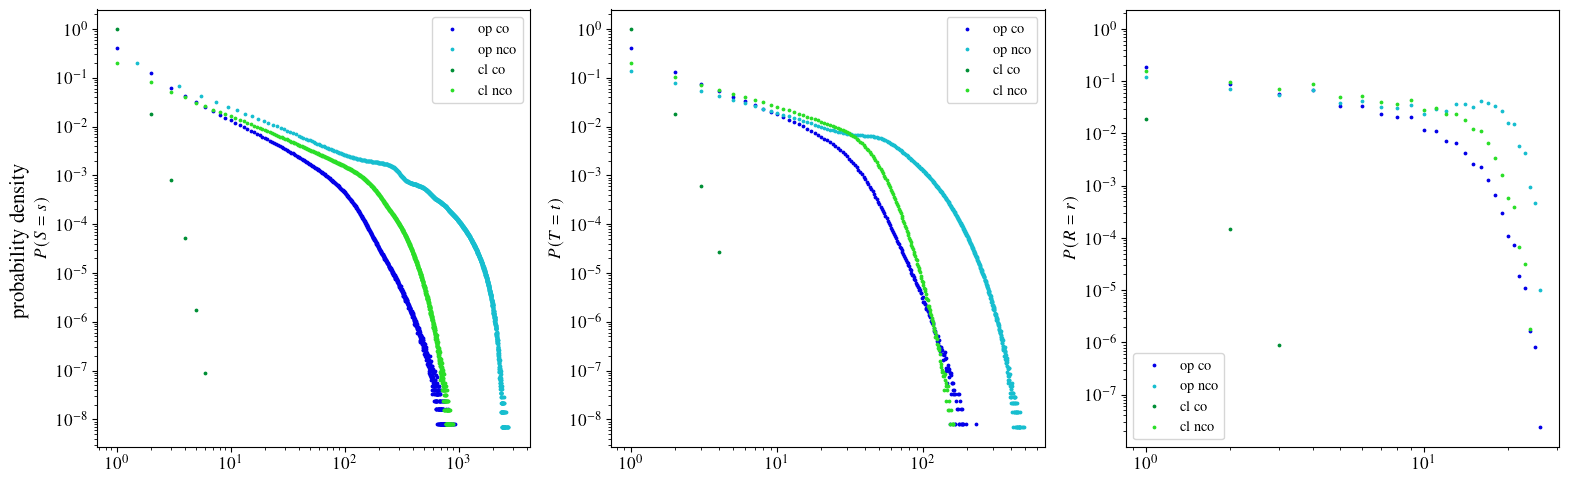

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
fig.supylabel("probability density")
# grid 20, different pb
for b, p in [("op", "co"), ("op", "nco"), ("cl", "co"), ("cl", "nco")]:
    data_dir = Path().cwd().joinpath(f"data/2D/d2_g20_c7_{b}_{p}")
    # df = load_combine_avalanche_data_samples(data_dir, with_dissipation=False, sample_count=N)
    centers, bins = load_3d_dist(data_dir/"avalanche_distribution.npz")

    plt.subplot(131)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$P(S=s)$")
    plt.scatter(centers[0], bins.sum(axis=(1, 2)), label=f"{b} {p}", s=3)
    plt.legend(fontsize="small")

    plt.subplot(132)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$P(T=t)$")
    plt.scatter(centers[1], bins.sum(axis=(0, 2)), label=f"{b} {p}", s=3)
    plt.legend(fontsize="small")

    plt.subplot(133)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$P(R=r)$")
    plt.scatter(centers[2], bins.sum(axis=(0, 1)), label=f"{b} {p}", s=3)
    plt.legend(fontsize="small")

# fig.savefig(fig_dir/"comparison_pb_distributions.pdf", dpi=300)
fig.savefig(fig_dir/"comparison_pb_distributions.png", dpi=300)
